In [1]:
#librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
import matplotlib.cm as cm
import random
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
#from scipy.cluster.hierarchy import dendrogram


In [2]:
def grafici(x):
   fig, ax = plt.subplots(1,2, figsize=(15,5))
   palette = sns.color_palette("Set2", n_colors=20)
   color = random.choice(palette)
   plt.xlabel(x.name)
   sns.histplot(x, kde=True, stat="density", ax=ax[0], color=color)
   plt.xlabel(x.name)
   sns.boxplot(x, ax=ax[1], color=color)

In [3]:
#outliers
def find_outliers (x):
#dataset_v2['sports'].to_numpy()
  range = iqr(x)
  lower_bound = np.percentile(x, 25) - (1.5 * range)
  upper_bound = np.percentile(x, 75) + (1.5 * range)
  print("Mean = {},\n Variance = {}".format(x.mean(),x.var()))
  return [i for i in x if i < lower_bound or i > upper_bound]

In [4]:
#carico il dataset
folderpath = "/content/speeddating.csv"
dataset = pd.read_csv(folderpath)


In [5]:
dataset.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


In [6]:
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    has_null                         8378 non-null   object 
 1    wave                             8378 non-null   float64
 2    gender                           8378 non-null   object 
 3    age                              8283 non-null   float64
 4    age_o                            8274 non-null   float64
 5    d_age                            8378 non-null   float64
 6    d_d_age                          8378 non-null   object 
 7    race                             8378 non-null   object 
 8    race_o                           8378 non-null   object 
 9    samerace                         8378 non-null   object 
 10   importance_same_race             8299 non-null   float64
 11   importance_same_religion         8299 non-null   float64
 12   d_im

In [7]:
dataset.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,...,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,...,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,...,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,...,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,...,8.000000,6.000000,4.000000,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000
75%,15.000000,28.000000,28.000000,5.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,...,9.000000,8.000000,7.000000,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000
max,21.000000,55.000000,55.000000,37.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000


In [8]:
#prima versione dataset con features discusse in meeting 1 ---- il dataset è stato ridotto da 102 a 31 colonne
dataset_v1 = pd.DataFrame()
dataset_v1 = dataset[['gender',
                      'age',
                      'age_o',
                      'attractive_important',
                      'sincere_important',
                      'intellicence_important',
                      'funny_important',
                      'ambtition_important',
                      'shared_interests_important',
                      'importance_same_religion',
                      'attractive',
                      'sincere',
                      'intelligence',
                      'funny',
                      'ambition',
                      'sports',
                      'tvsports',
                      'exercise',
                      'dining',
                      'museums',
                      'art',
                      'hiking',
                      'gaming',
                      'clubbing',
                      'reading',
                      'tv',
                      'theater',
                      'movies',
                      'concerts',
                      'music',
                      'shopping',
                      'yoga'
                      ]].copy()

In [9]:
#correggo gli errori di spelling
dataset_v1 = dataset_v1.rename(columns={"intellicence_important": "intelligence_important", "ambtition_important": "ambition_important"})

In [10]:
dataset_v1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      8378 non-null   object 
 1   age                         8283 non-null   float64
 2   age_o                       8274 non-null   float64
 3   attractive_important        8299 non-null   float64
 4   sincere_important           8299 non-null   float64
 5   intelligence_important      8299 non-null   float64
 6   funny_important             8289 non-null   float64
 7   ambition_important          8279 non-null   float64
 8   shared_interests_important  8257 non-null   float64
 9   importance_same_religion    8299 non-null   float64
 10  attractive                  8273 non-null   float64
 11  sincere                     8273 non-null   float64
 12  intelligence                8273 non-null   float64
 13  funny                       8273 

In [11]:
#valori duplicati
#tutti i duplicati sono considerati True
a = dataset.duplicated(keep = False).sum() #non ci sono id che falsano il dato
b = dataset_v1.duplicated(keep = False).sum()
print(" duplicate instances in the original dataset: {},\n duplicate instance in the reduced dataset: {}".format(a,b))

 duplicate instances in the original dataset: 0,
 duplicate instance in the reduced dataset: 5942


In [12]:
#valori nulli
dataset_v1.isna().sum()

,0
gender,0
age,95
age_o,104
attractive_important,79
sincere_important,79
intelligence_important,79
funny_important,89
ambition_important,99
shared_interests_important,121
importance_same_religion,79


In [13]:
dataset_v2 = dataset_v1.copy()

#Grafici variabili interessi#

In [14]:
interests = ['sports',
            'tvsports',
            'exercise',
            'dining',
            'museums',
            'art',
            'hiking',
            'gaming',
            'clubbing',
            'reading',
            'tv',
            'theater',
            'movies',
            'concerts',
            'music',
            'shopping',
            'yoga'
             ]

for column in interests:
    if not dataset_v2[column].mode().empty:
        mode_value = dataset_v2[column].mode()[0]
        dataset_v2[column] = dataset_v2[column].fillna(mode_value)

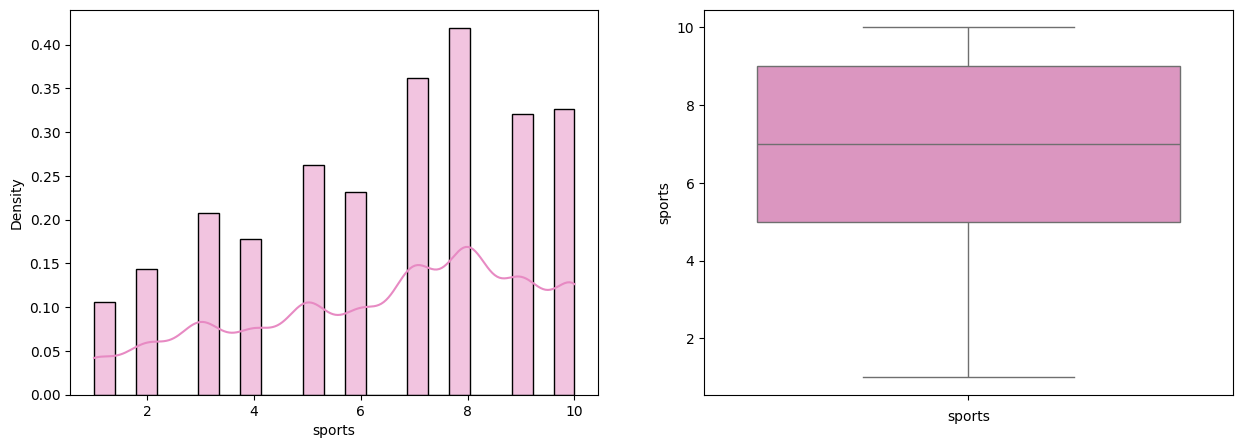

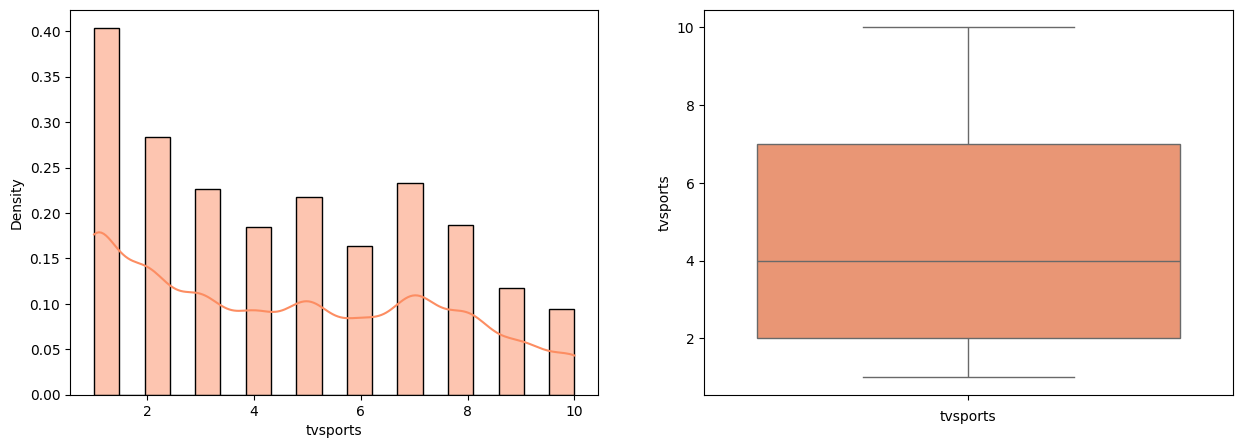

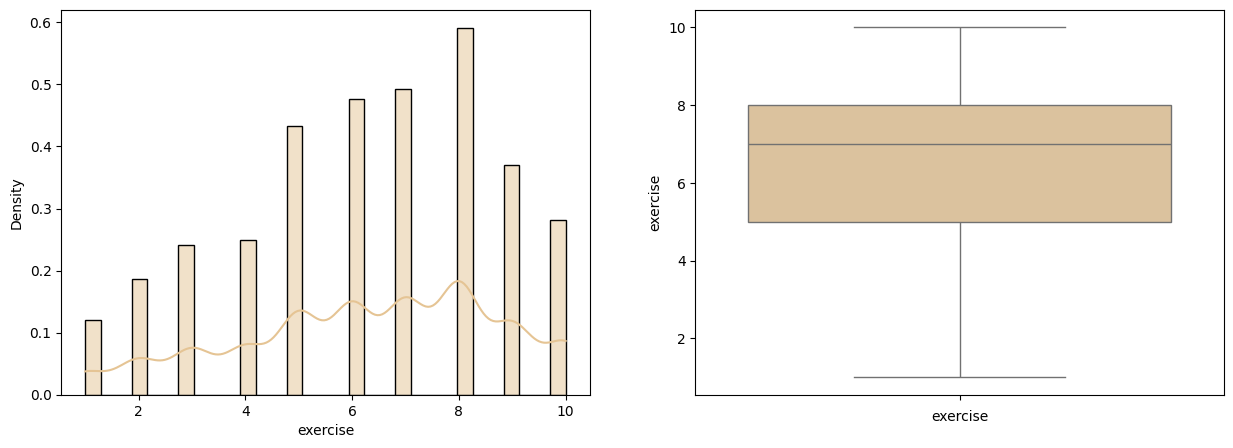

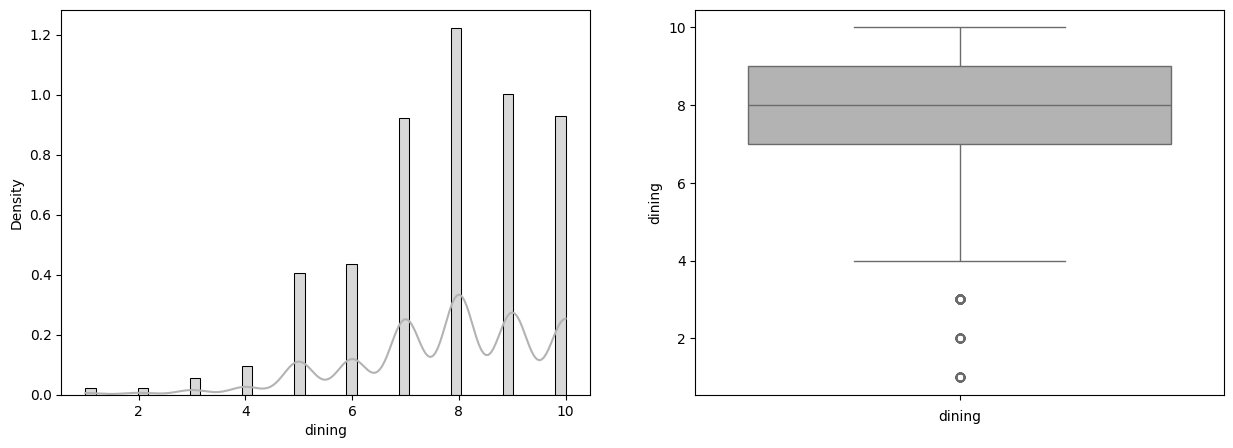

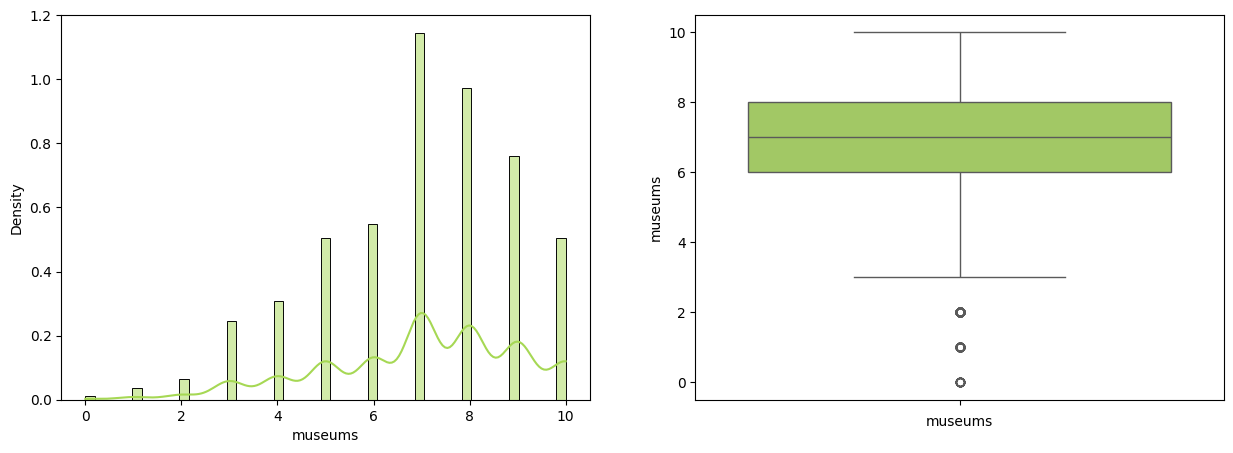

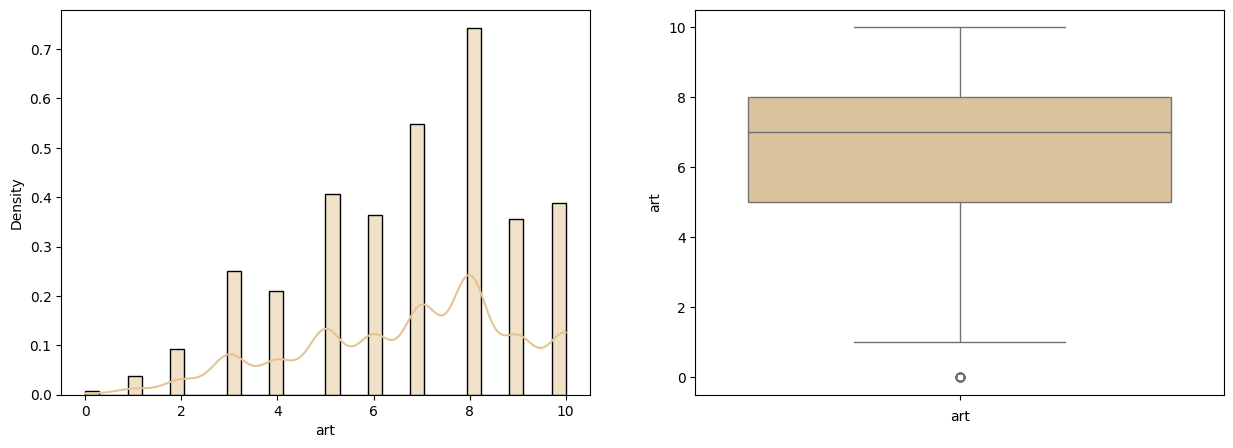

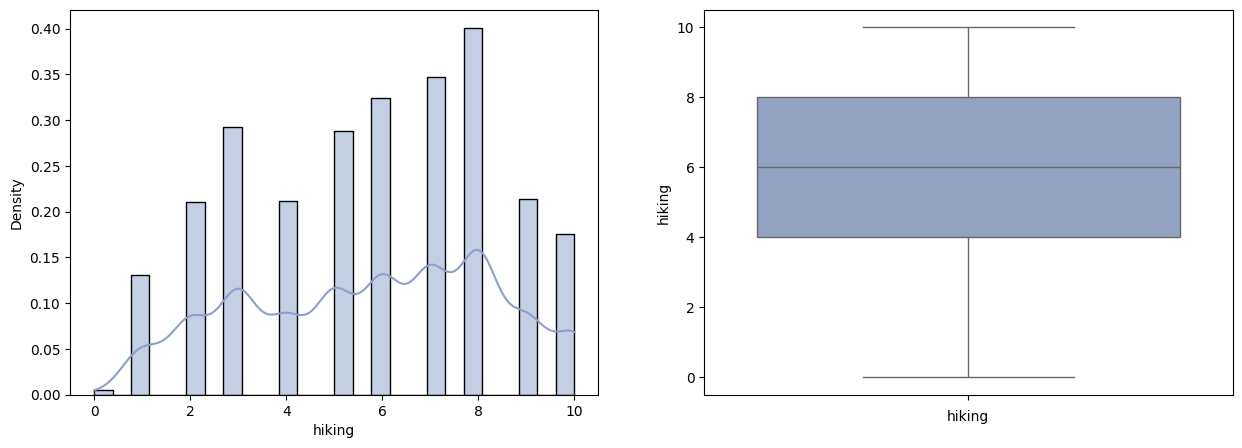

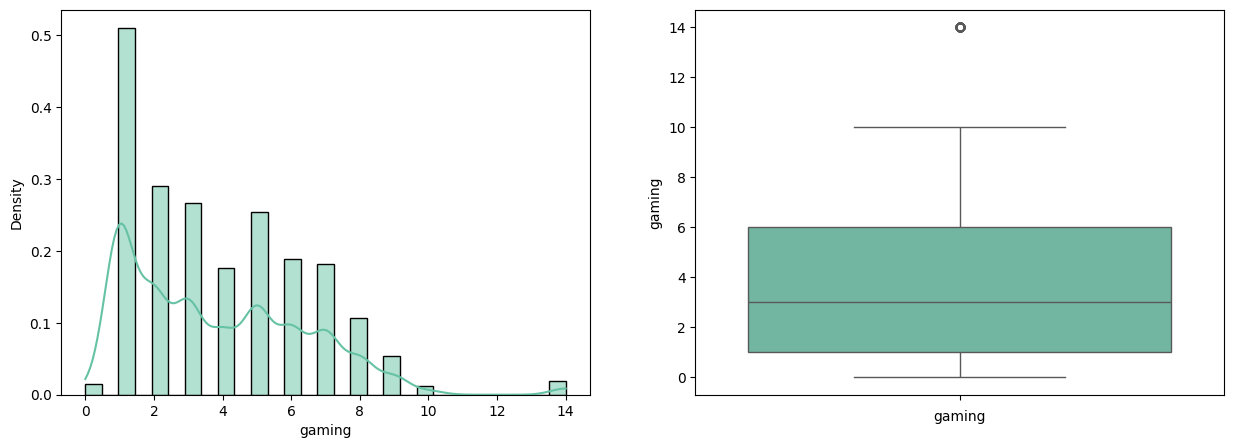

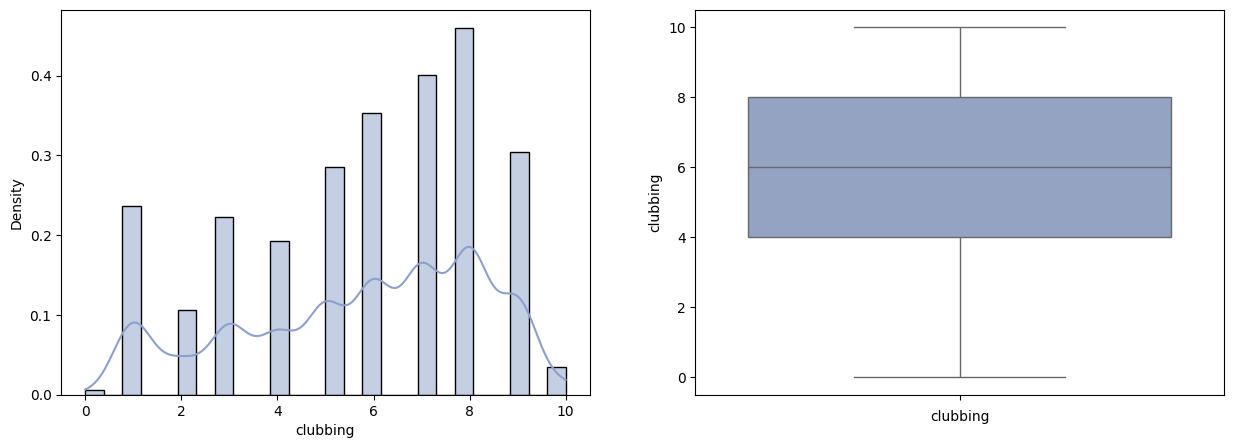

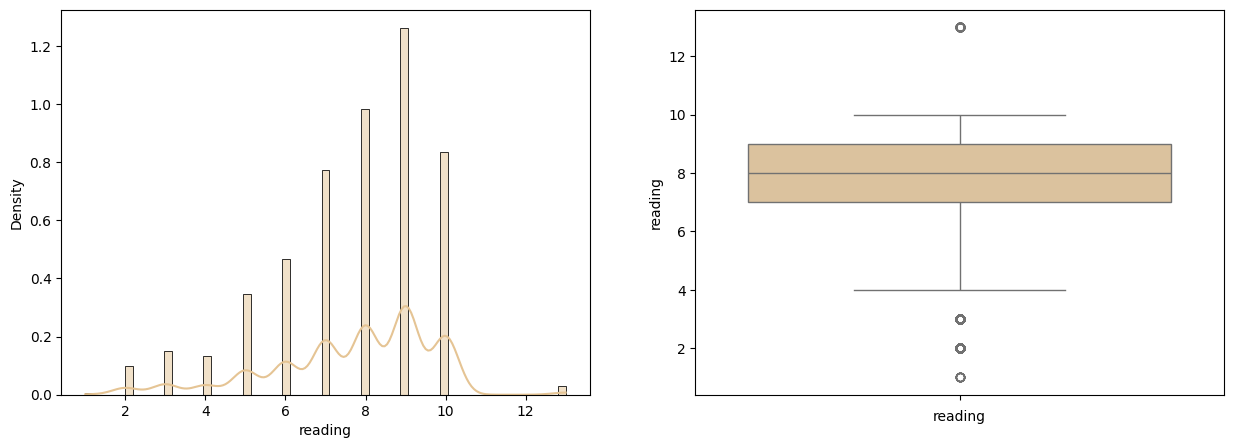

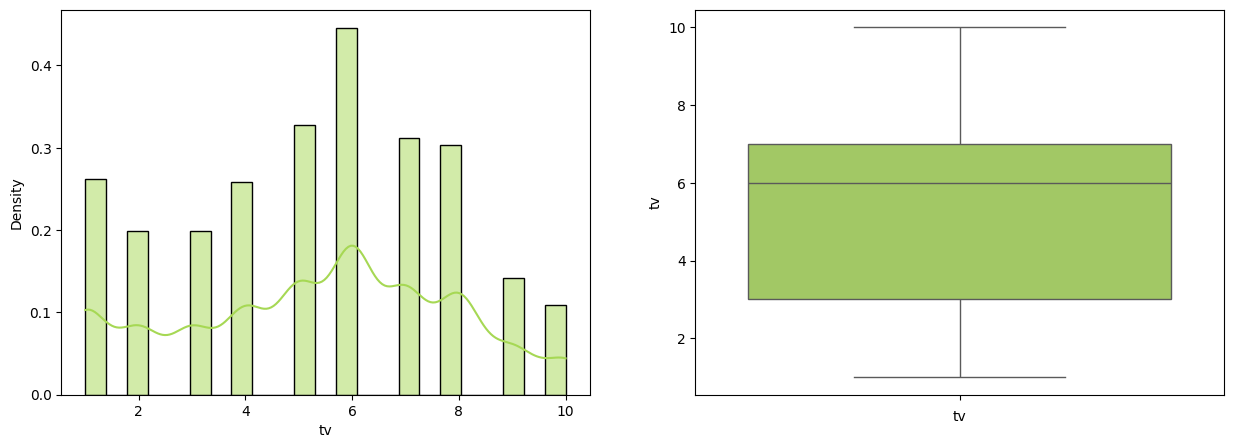

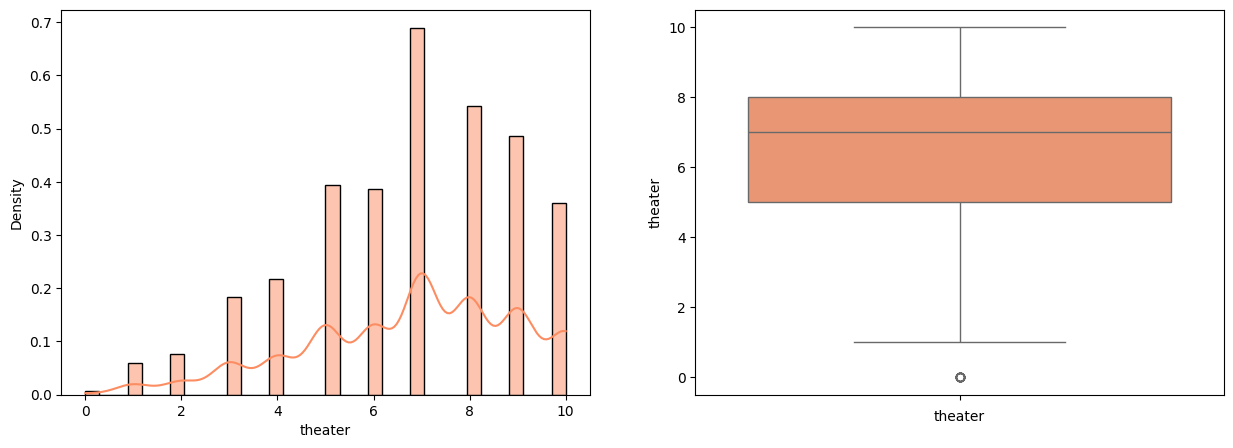

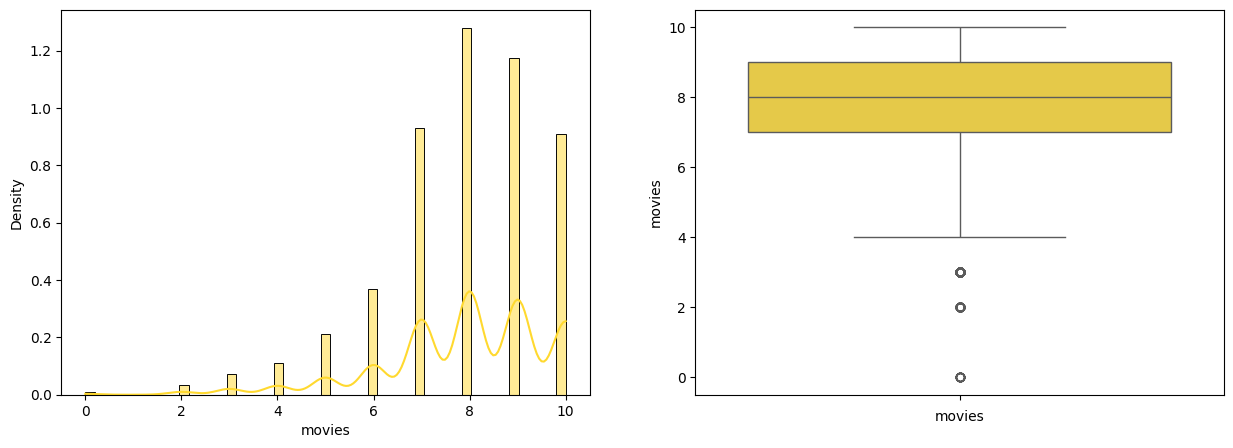

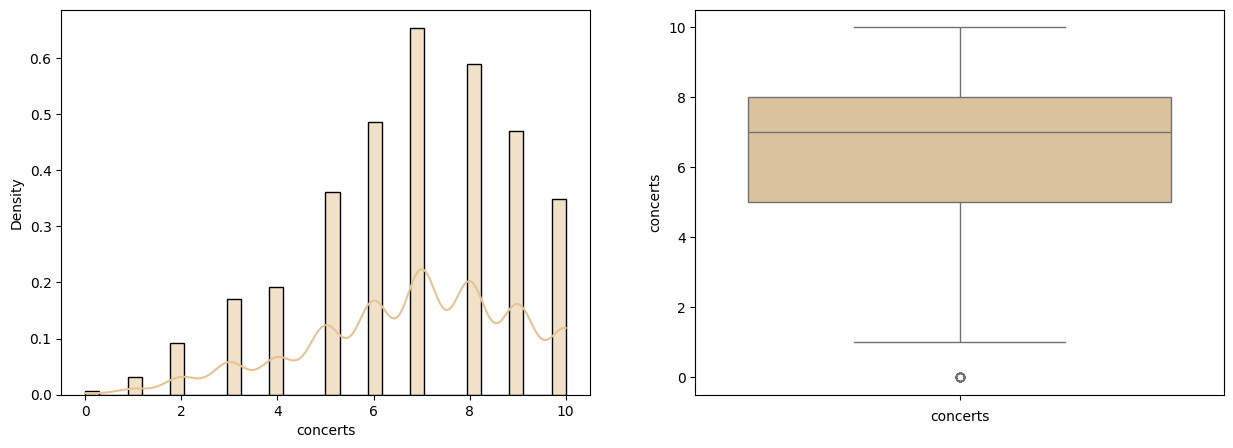

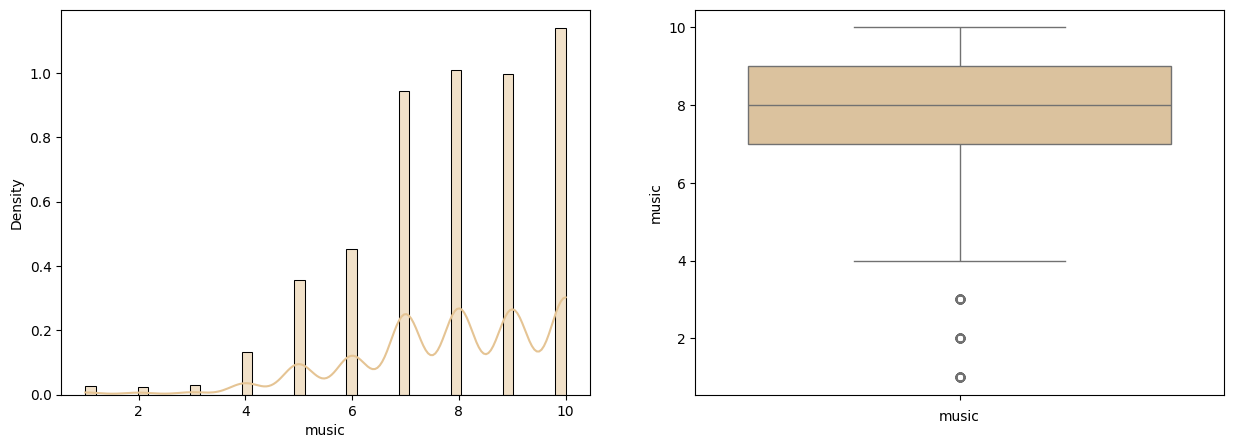

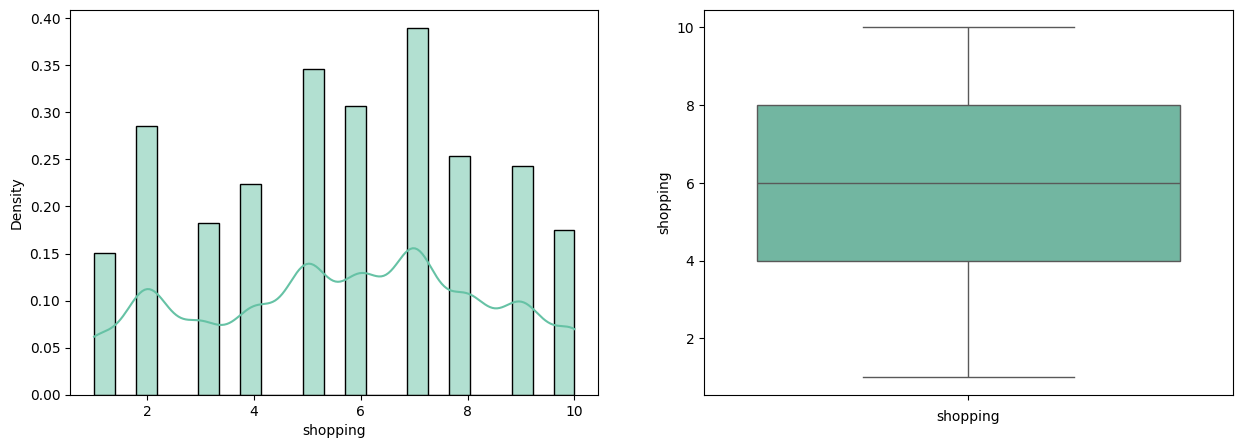

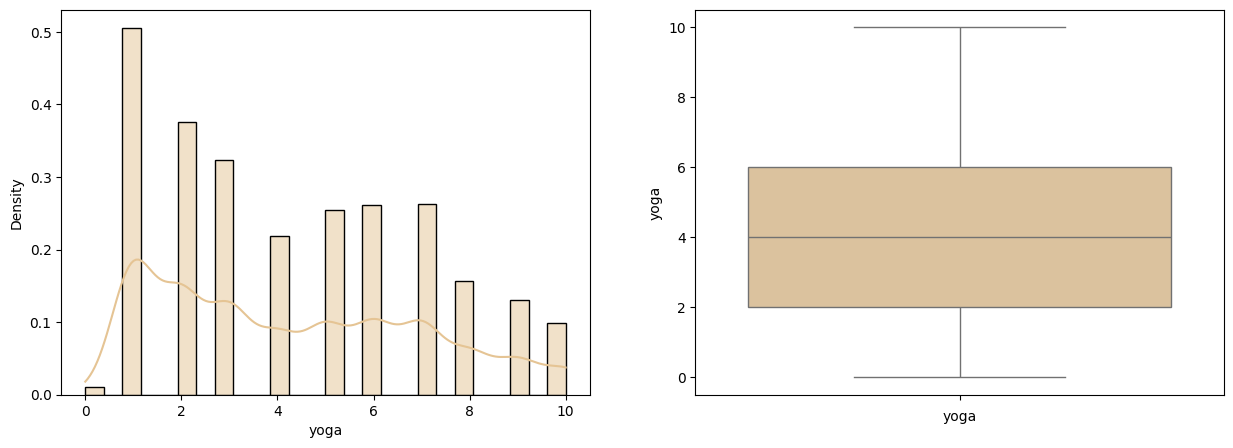

In [15]:
for column in interests:
    grafici(dataset_v2[column])

<Axes: title={'center': 'Correlation Matrix'}>

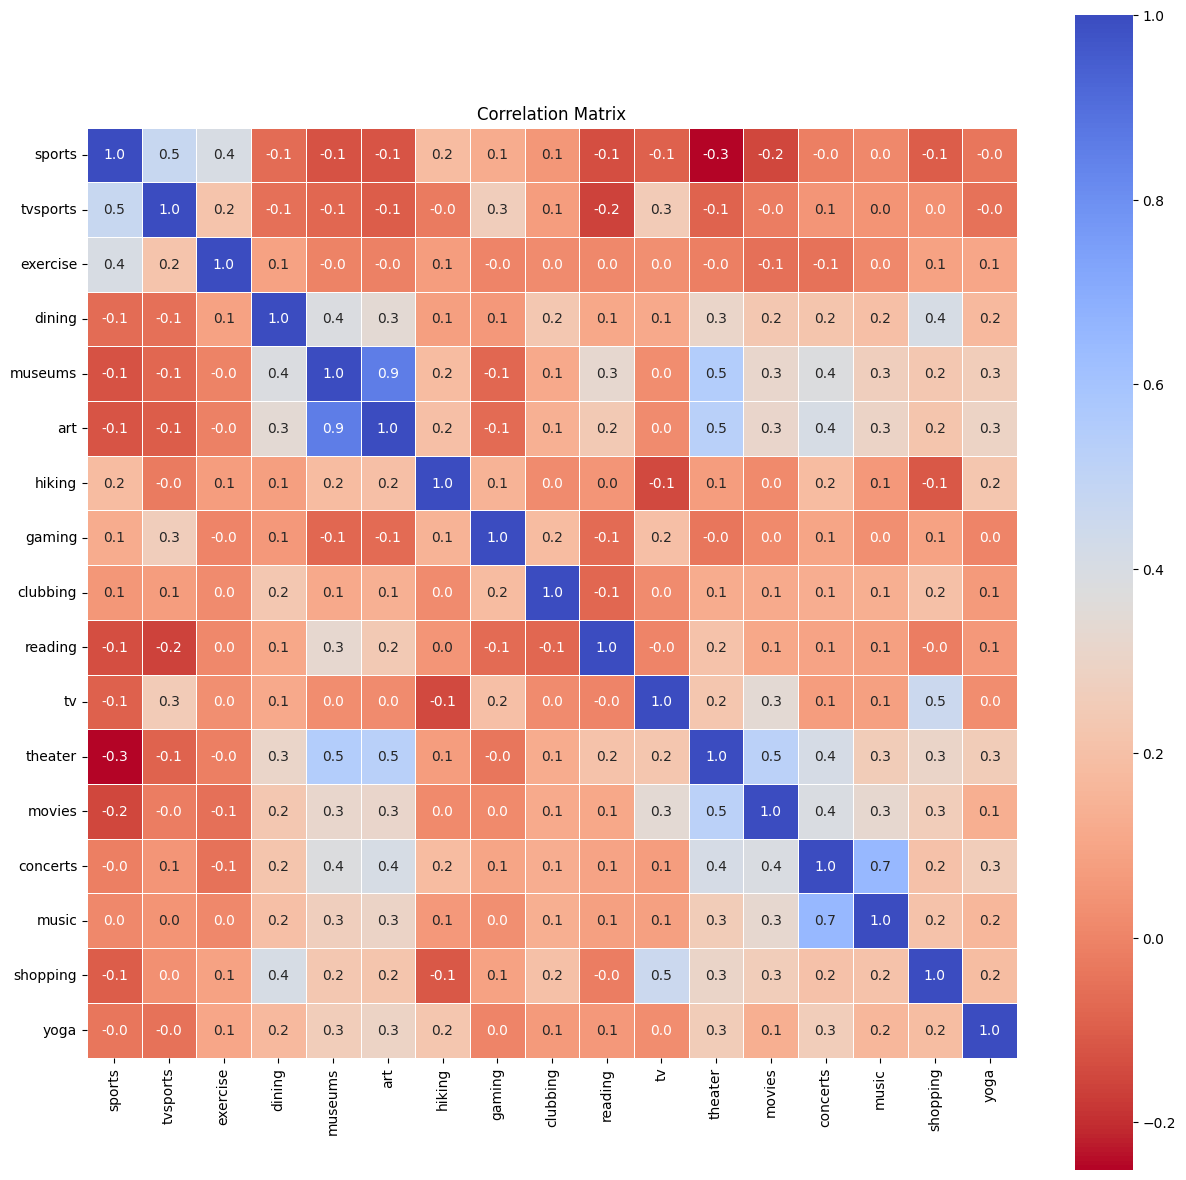

In [32]:
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(data=dataset_v2[interests].corr(), cmap ='coolwarm_r',annot=True,fmt=".1f", linewidth=.5,square=True)

#Grafici variabili utente#

In [16]:
self_description = ['age', #per adesso è qui poi sistemo
                    'attractive',
                    'sincere',
                    'intelligence',
                    'funny',
                    'ambition'
                    ]

for column in self_description:
    if not dataset_v2[column].mode().empty:
        mode_value = dataset_v2[column].mode()[0]
        dataset_v2[column] = dataset_v2[column].fillna(mode_value)

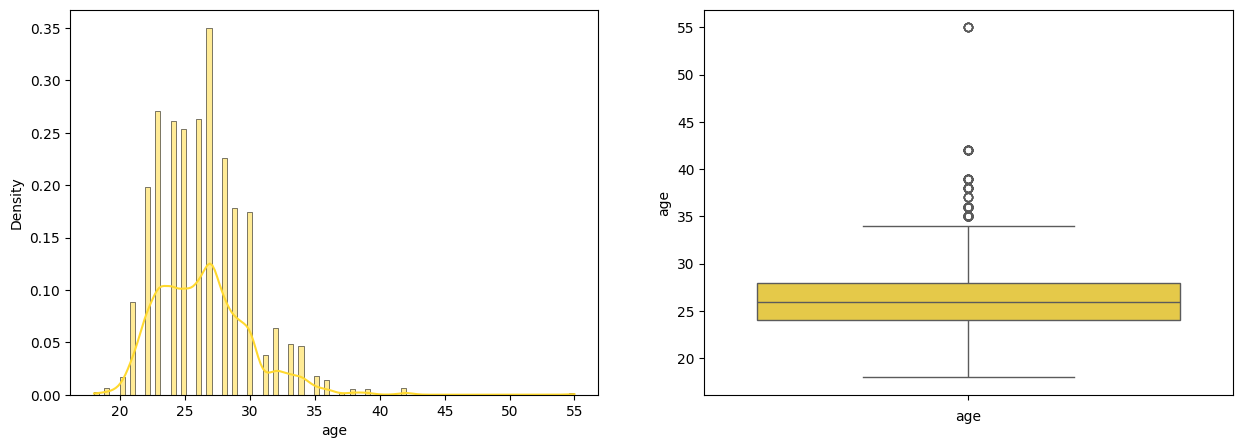

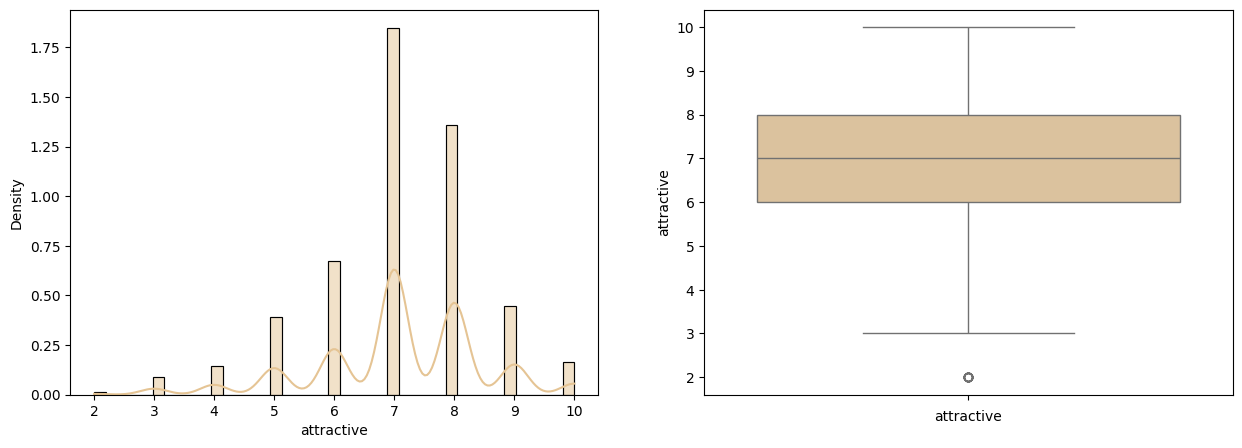

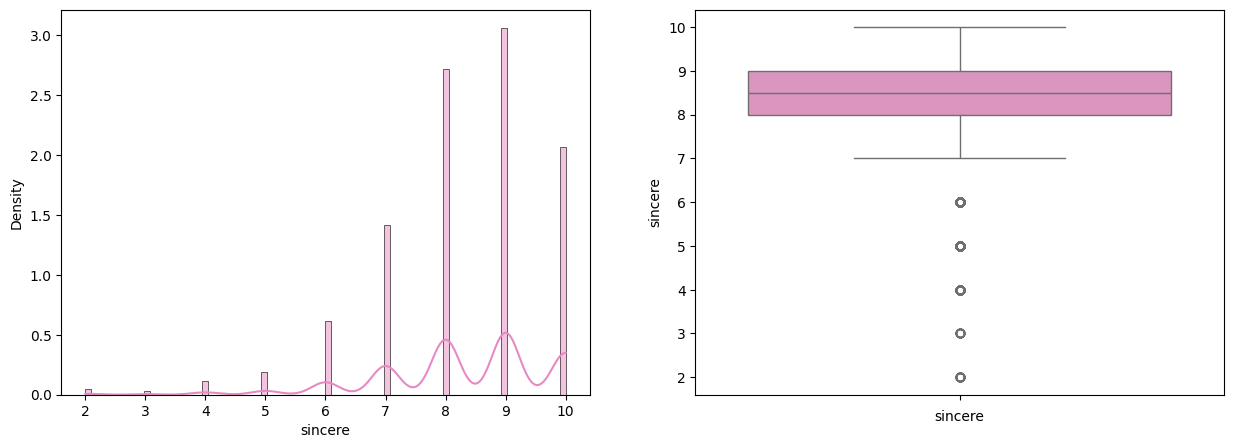

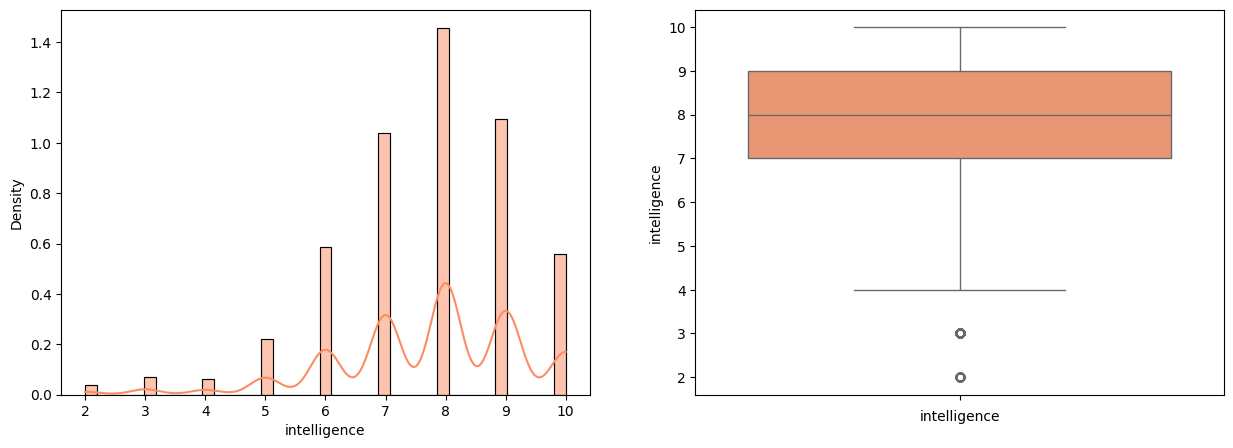

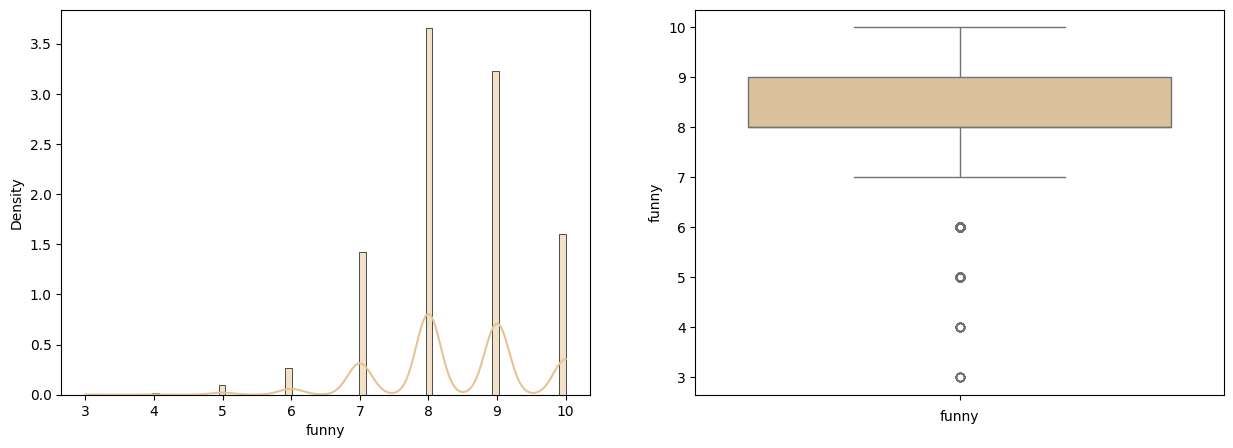

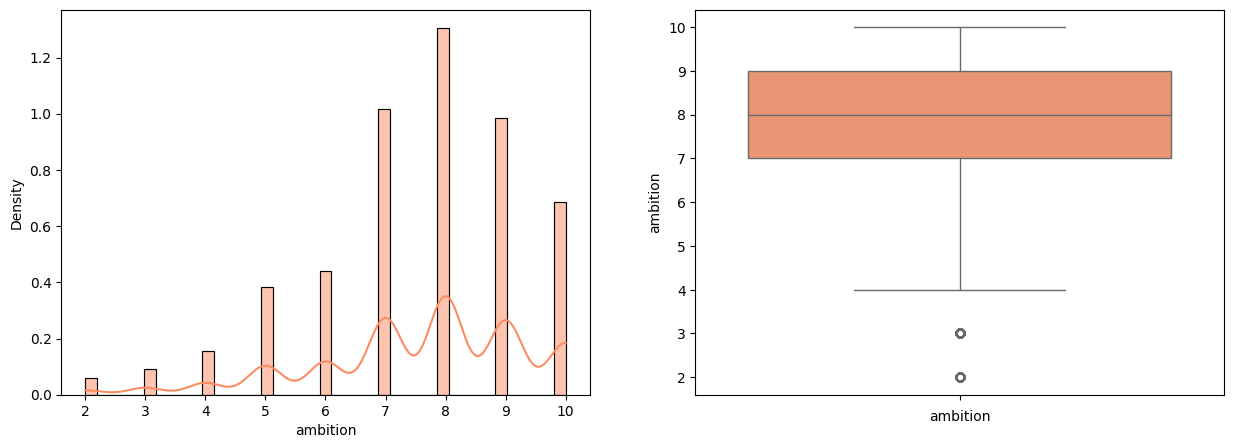

In [17]:
for column in self_description:
    grafici(dataset_v2[column])

#Grafici variabili partner

In [18]:
partner_attributes = ['age_o',
                      'importance_same_religion',
                      'attractive_important',
                      'sincere_important',
                      'intelligence_important',
                      'funny_important',
                      'ambition_important',
                      'shared_interests_important'
                      ]

for column in partner_attributes:
    if not dataset_v2[column].mode().empty:
        mode_value = dataset_v2[column].mode()[0]
        dataset_v2[column] = dataset_v2[column].fillna(mode_value)

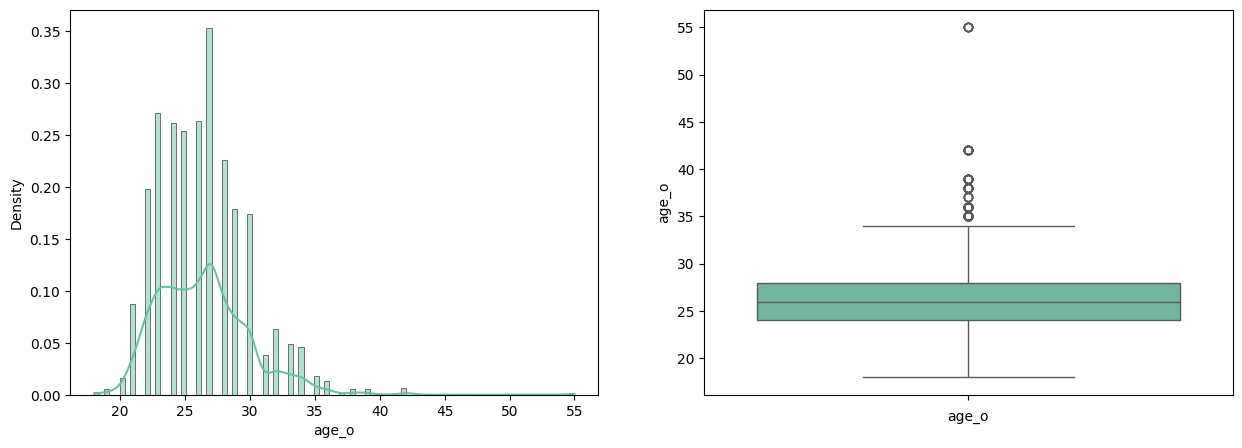

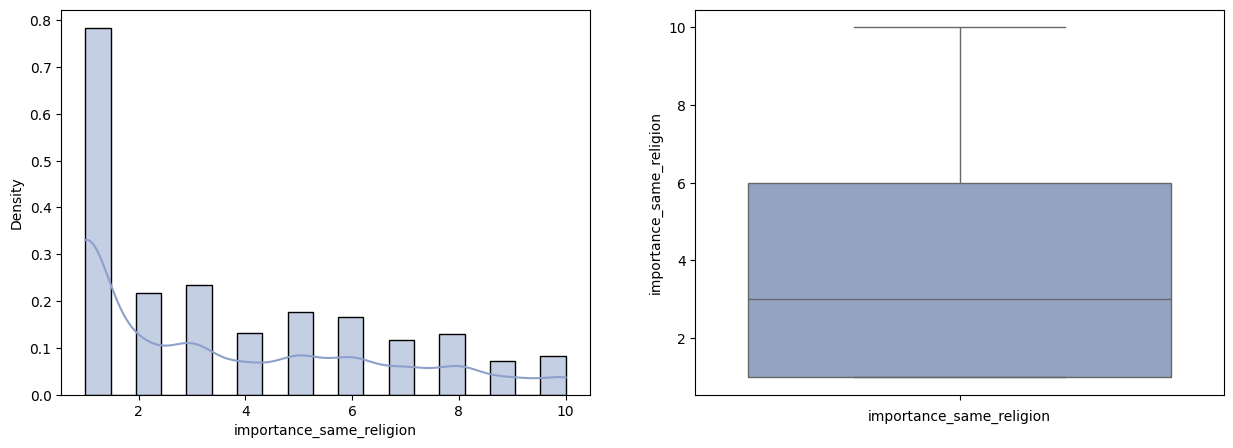

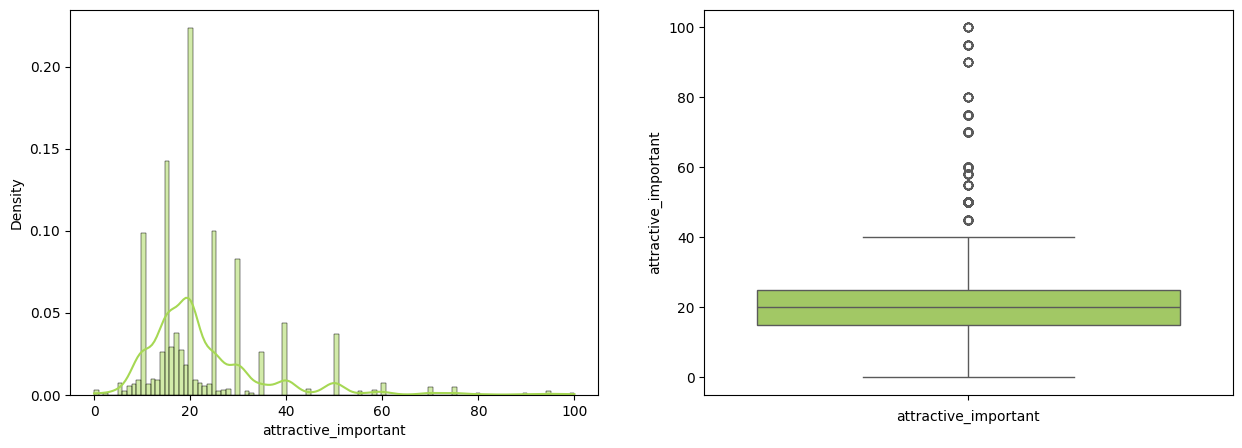

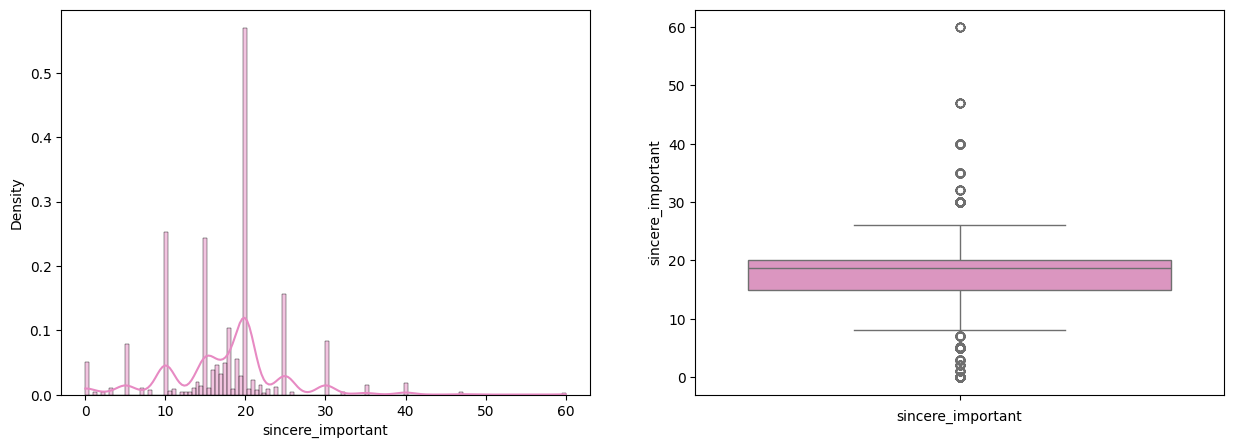

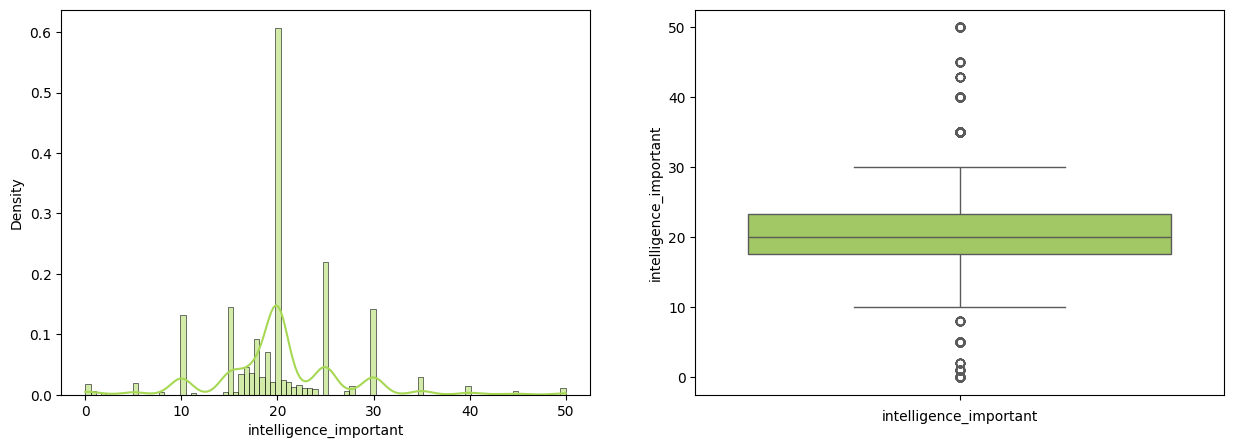

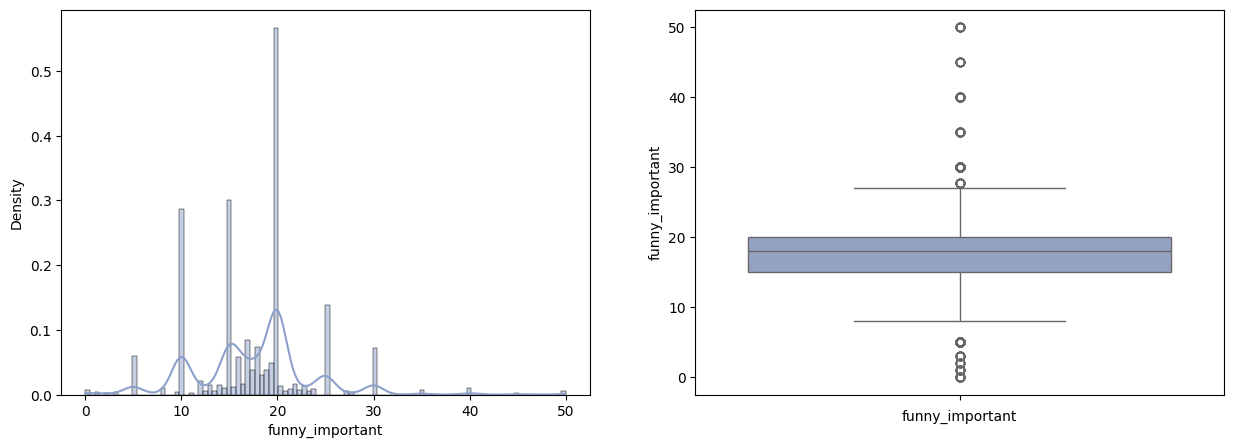

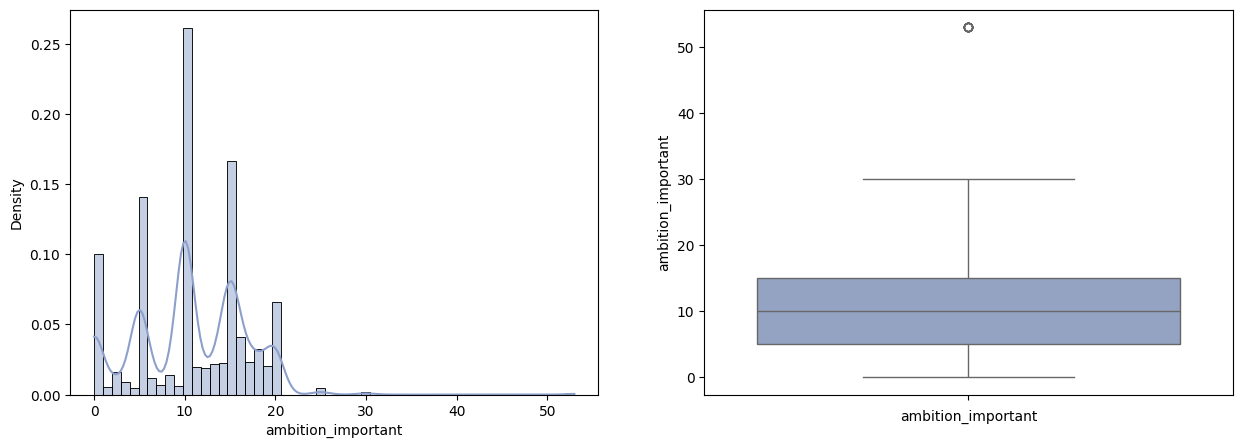

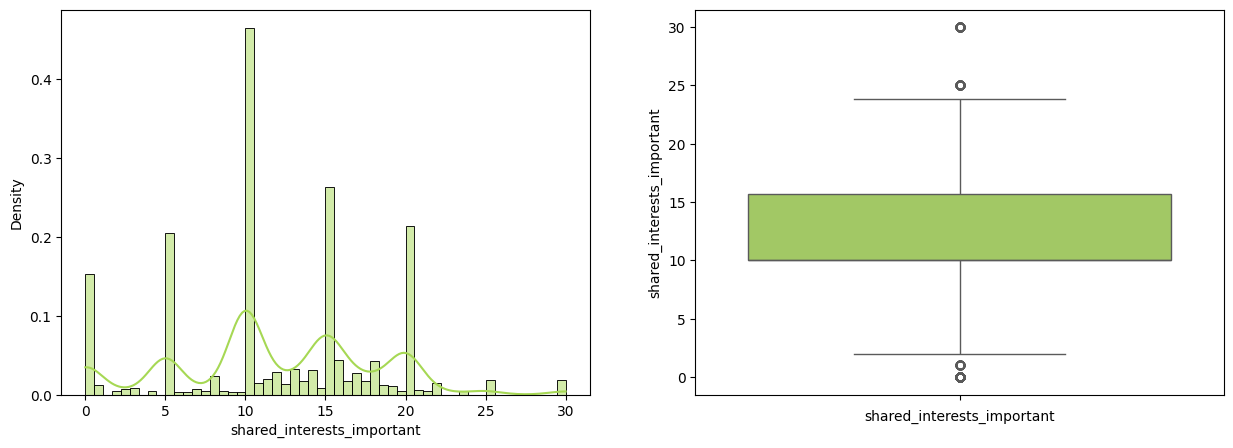

In [19]:
for column in partner_attributes:
    grafici(dataset_v2[column])

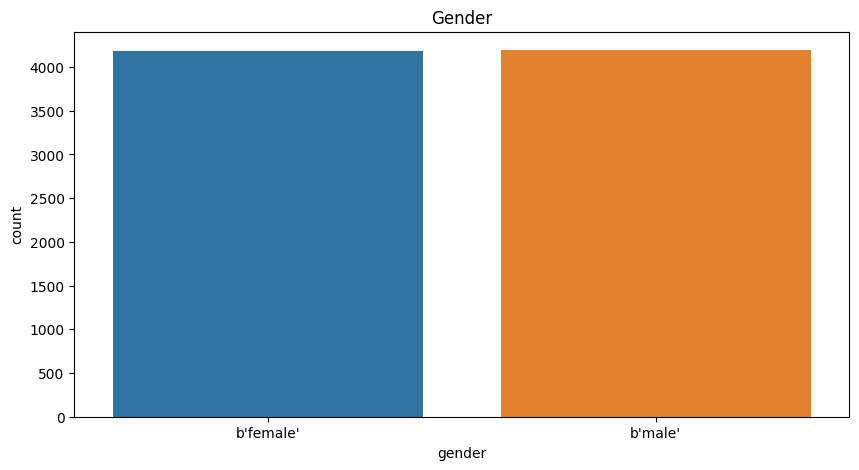

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=dataset_v2, hue ='gender')
plt.title('Gender')
plt.show()

#Correlazione tra variabili

In [21]:
#conversione binaria gender
dataset_v3 = dataset_v2.copy()
dataset_v3['gender'] = dataset_v3['gender'].where(dataset_v3['gender'] != "b'female'", 0.)
dataset_v3['gender'] = dataset_v3['gender'].where(dataset_v3['gender'] != "b'male'", 1.)
dataset_v3['gender']= pd.to_numeric(dataset_v3['gender']) # per convertire in float

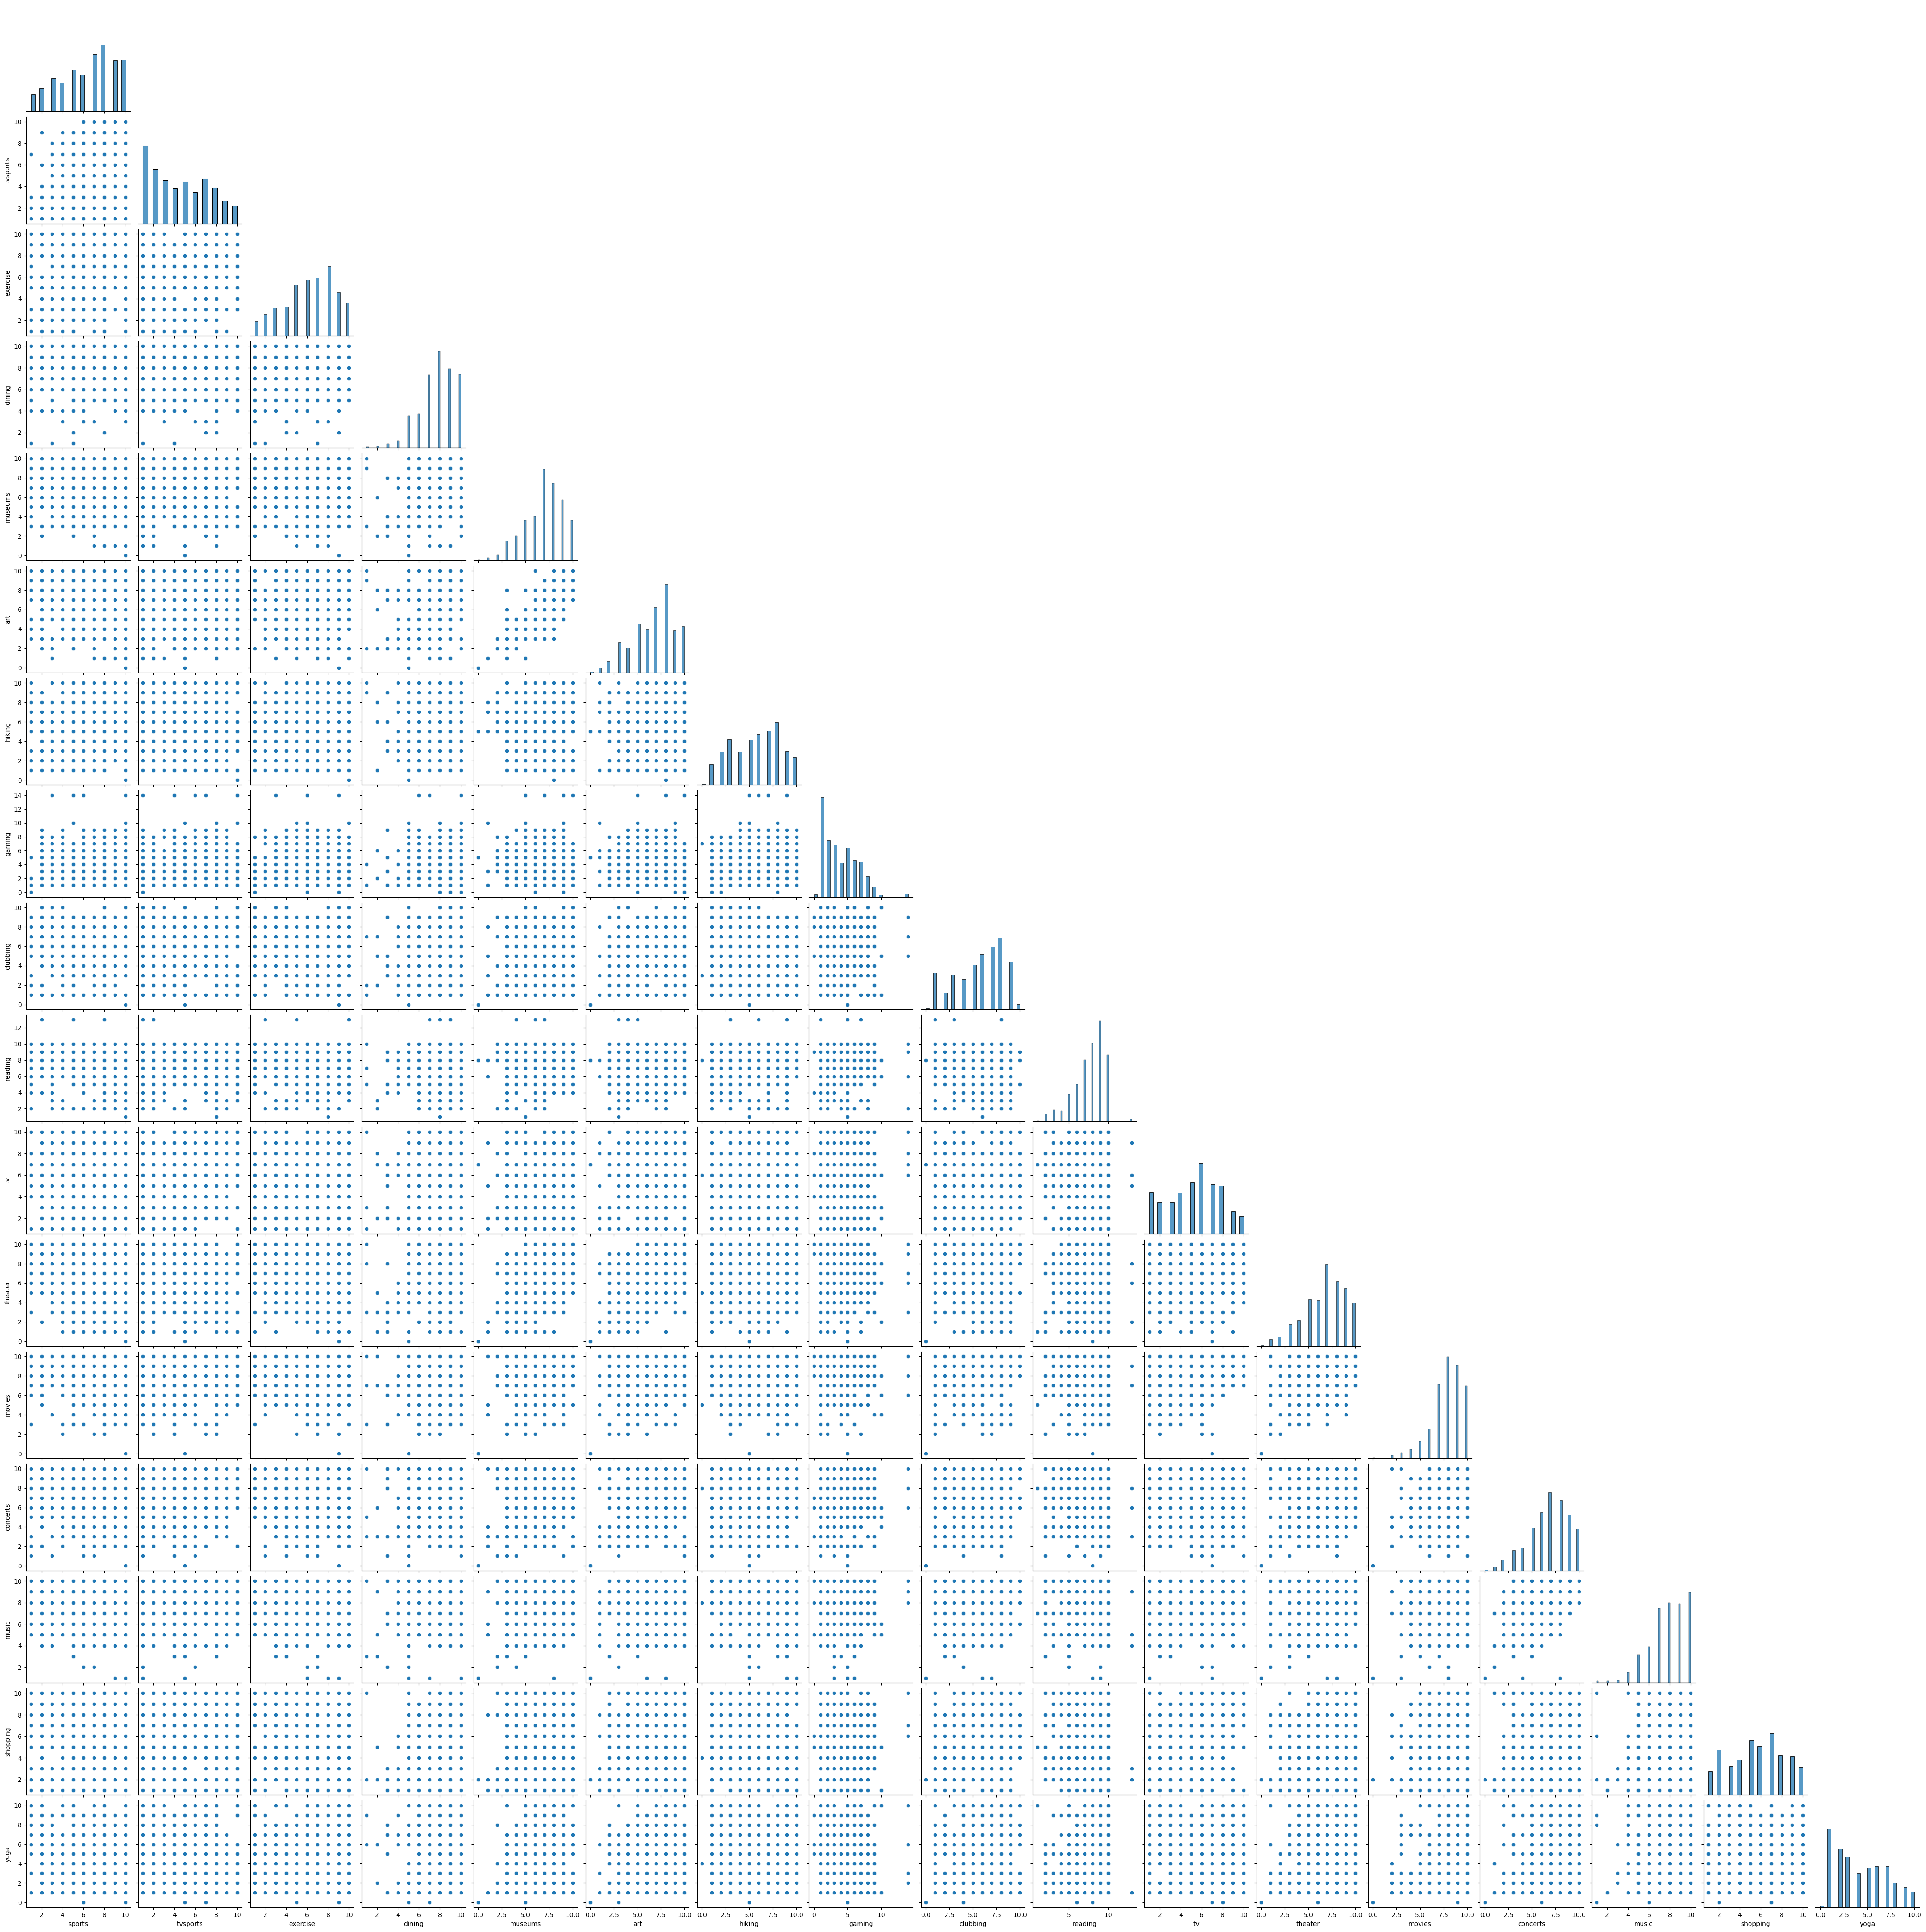

In [22]:
df = dataset_v3[interests].copy()
sns.pairplot(df, corner = True)

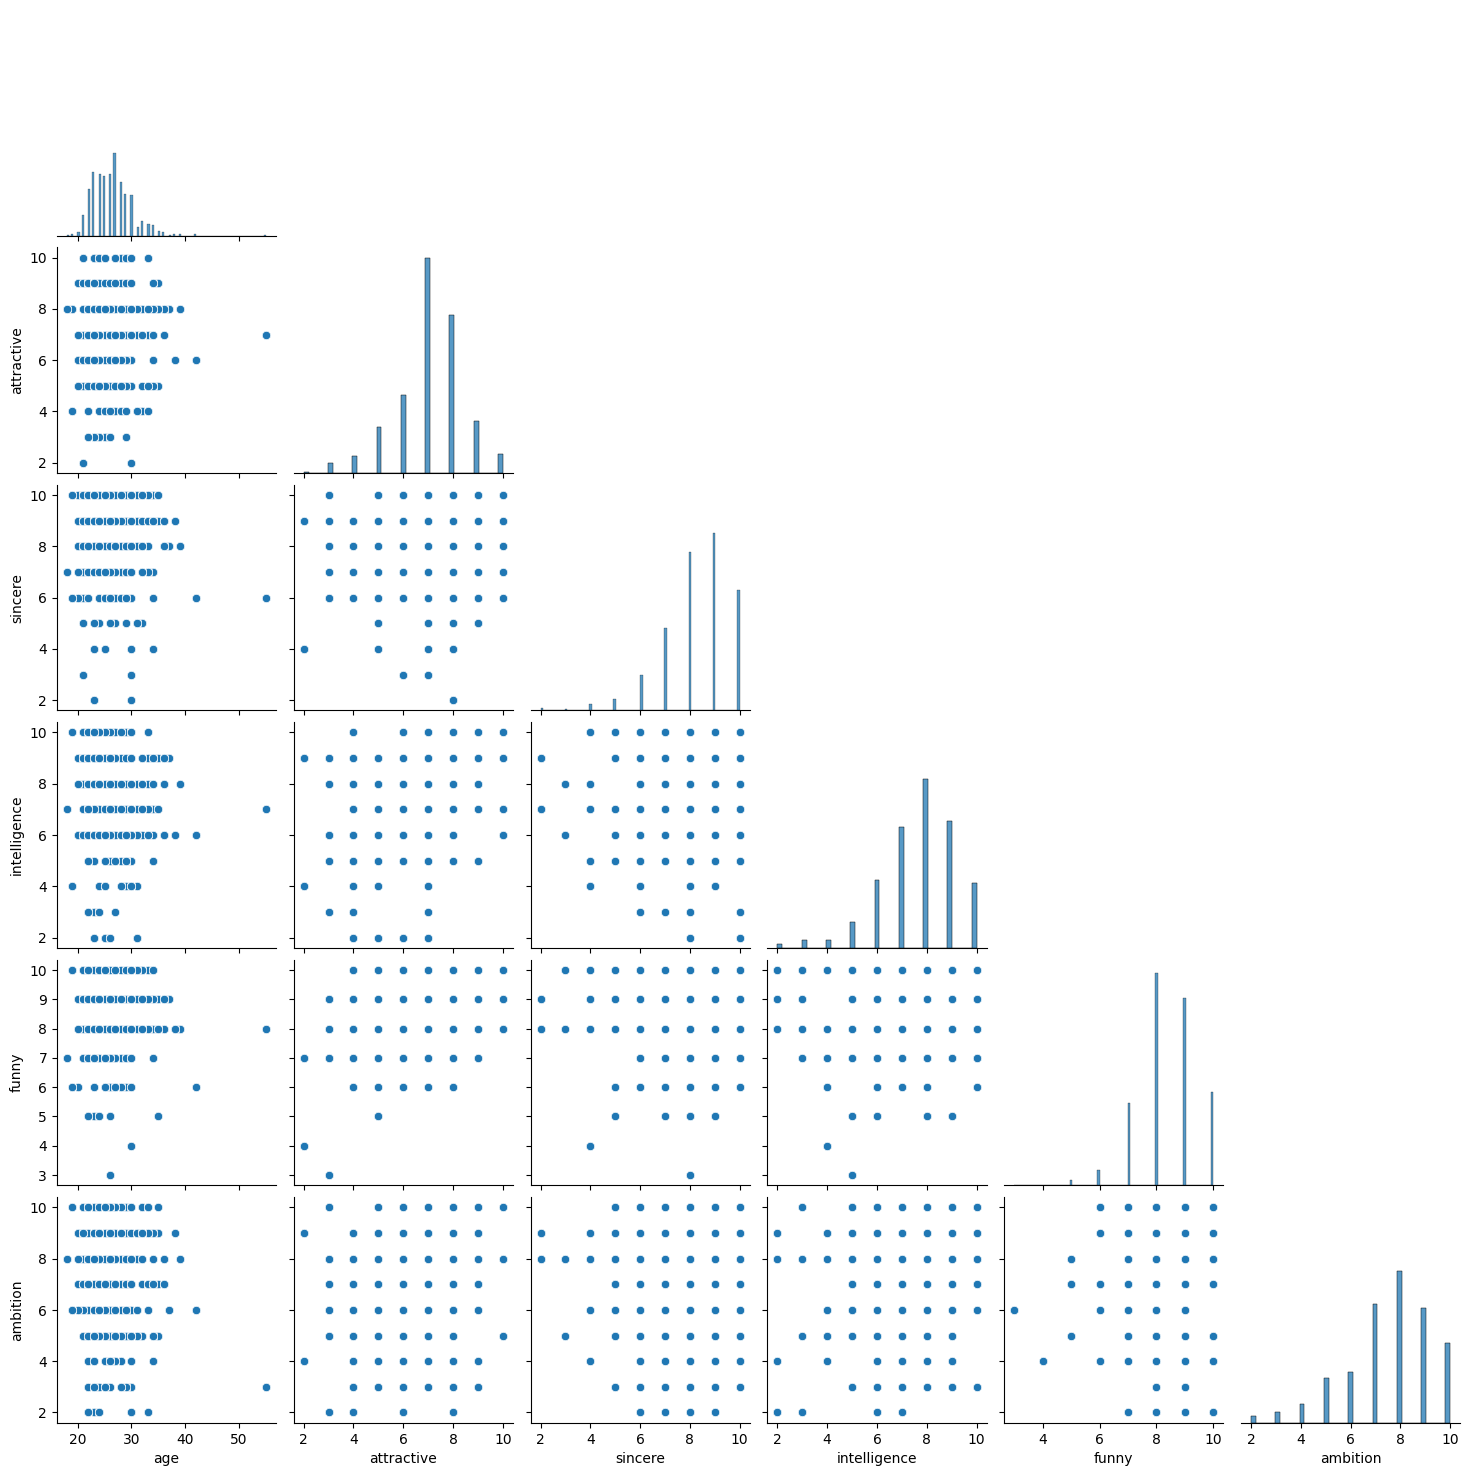

In [23]:
df = dataset_v3[self_description].copy()
sns.pairplot(df, corner=True )

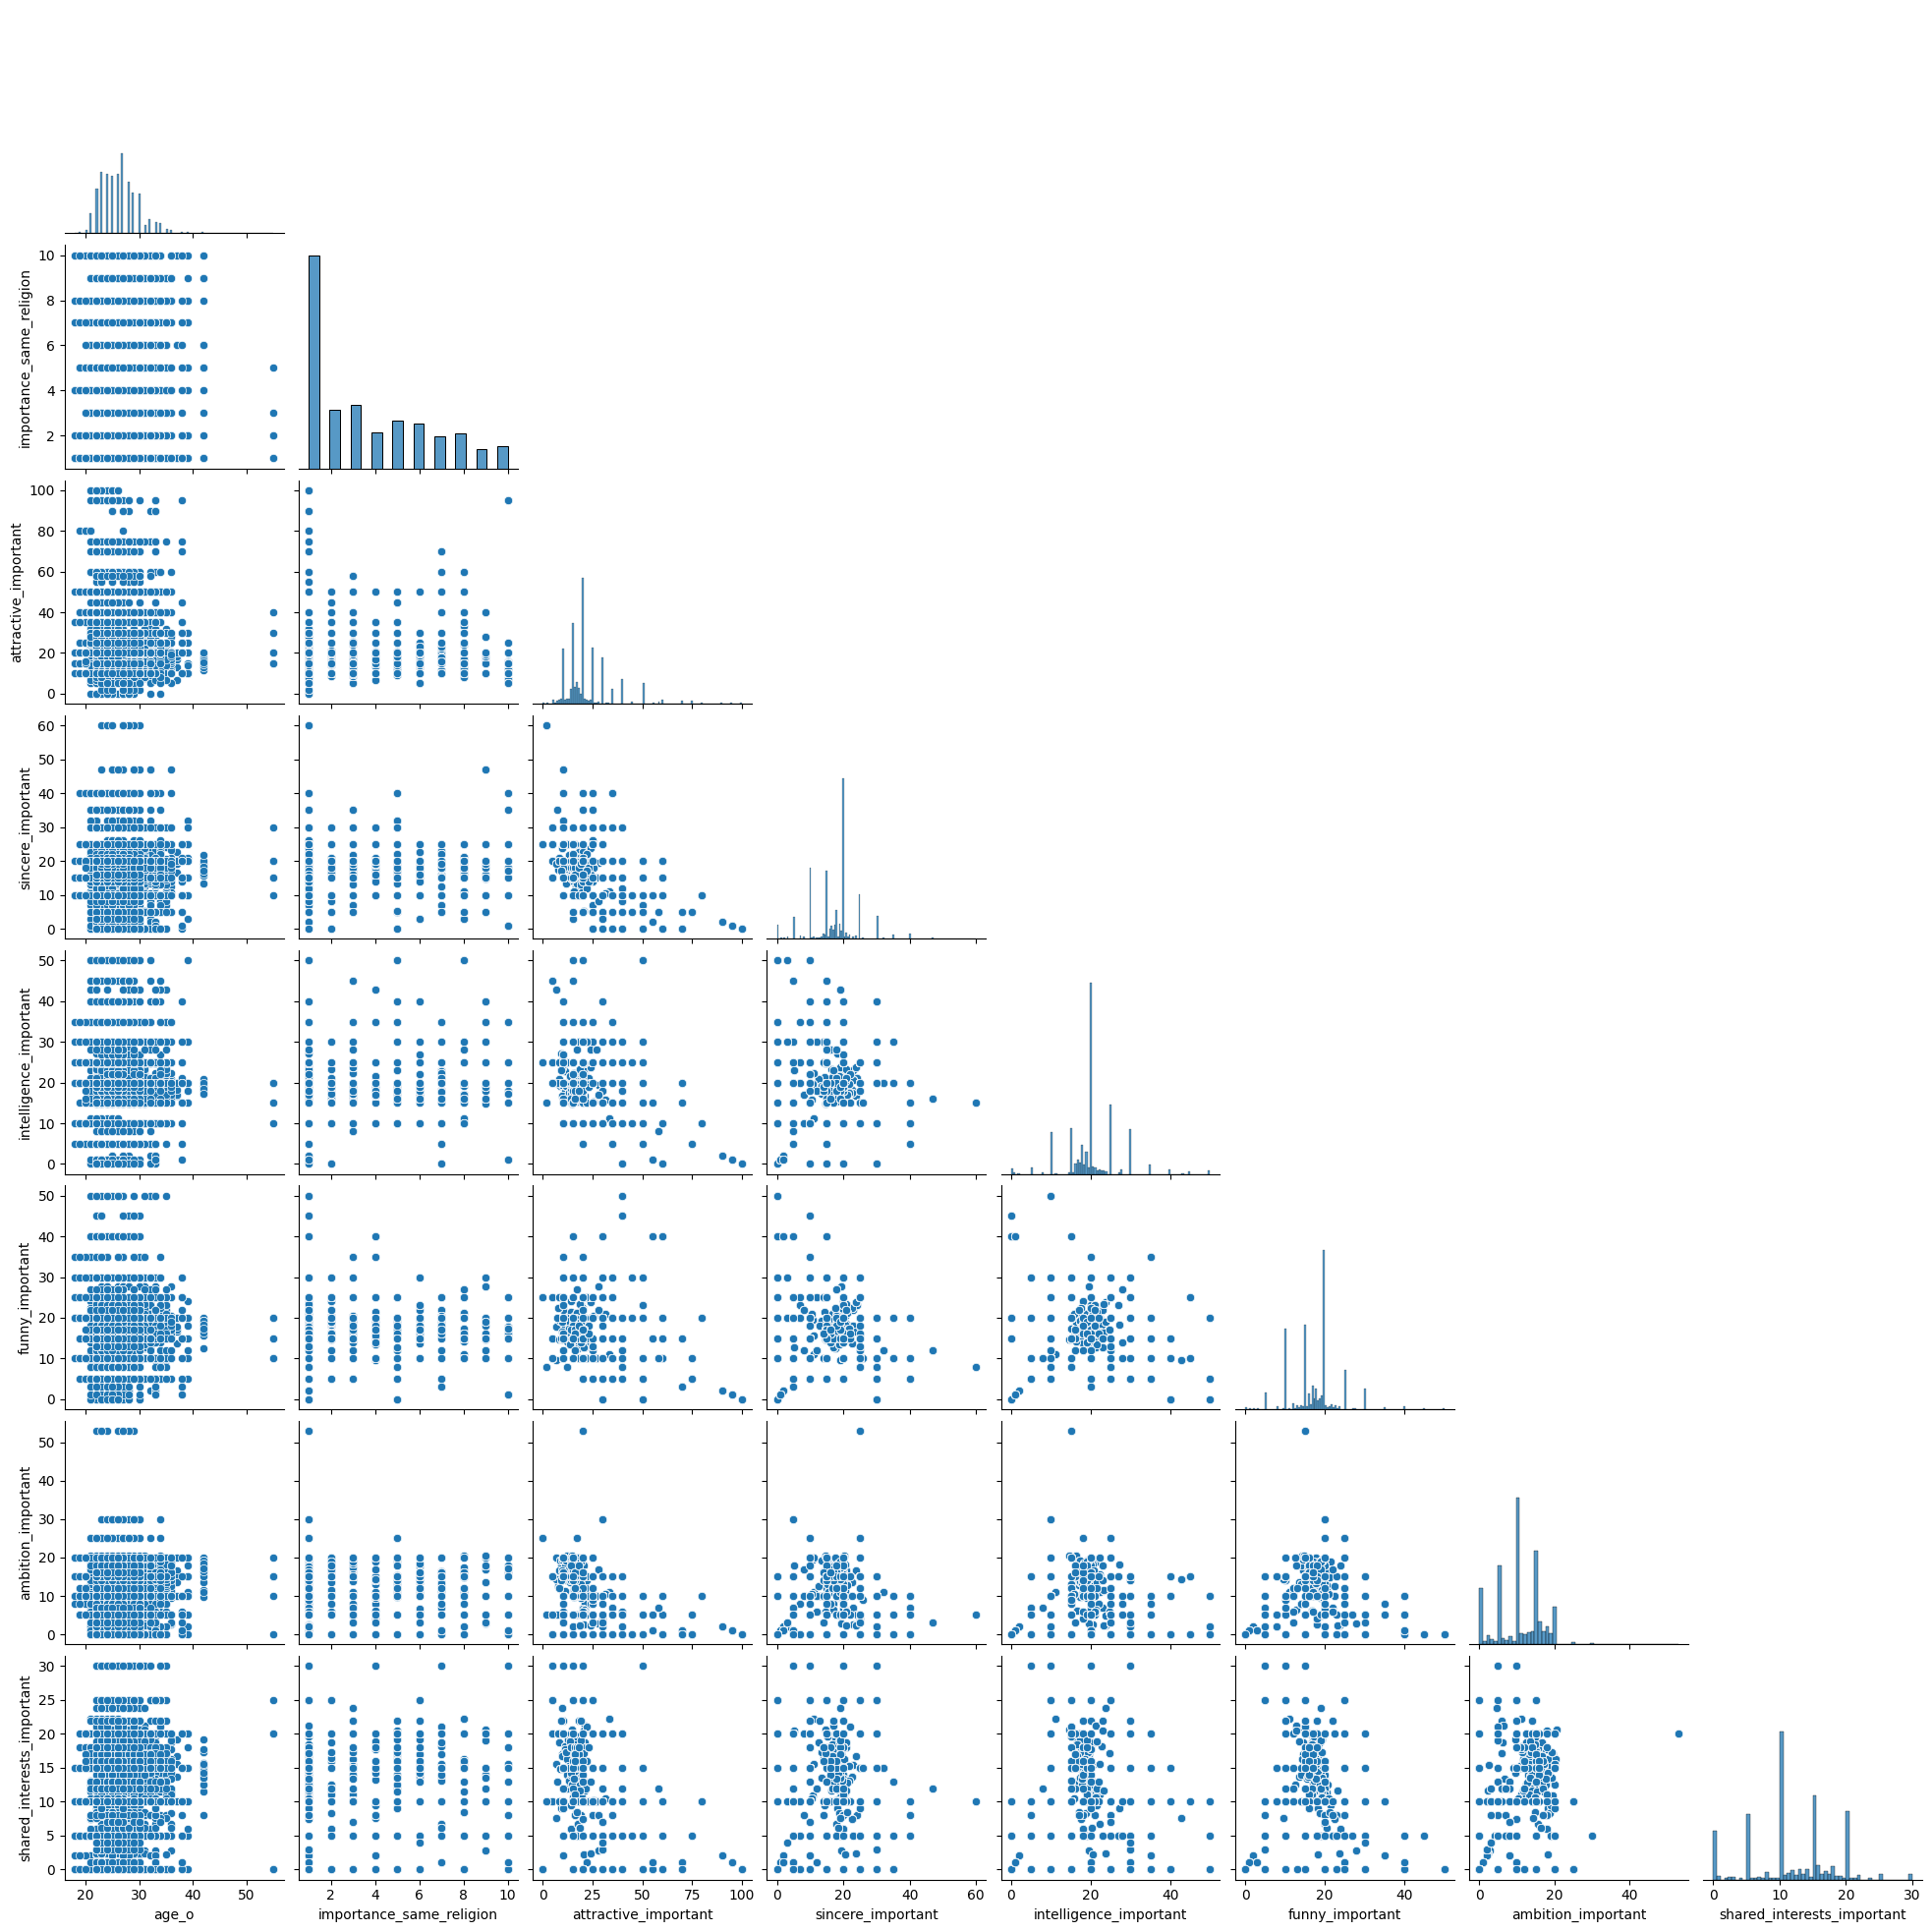

In [24]:
df = dataset_v3[partner_attributes].copy()
sns.pairplot(df, corner = True)

<Axes: title={'center': 'Correlation Matrix'}>

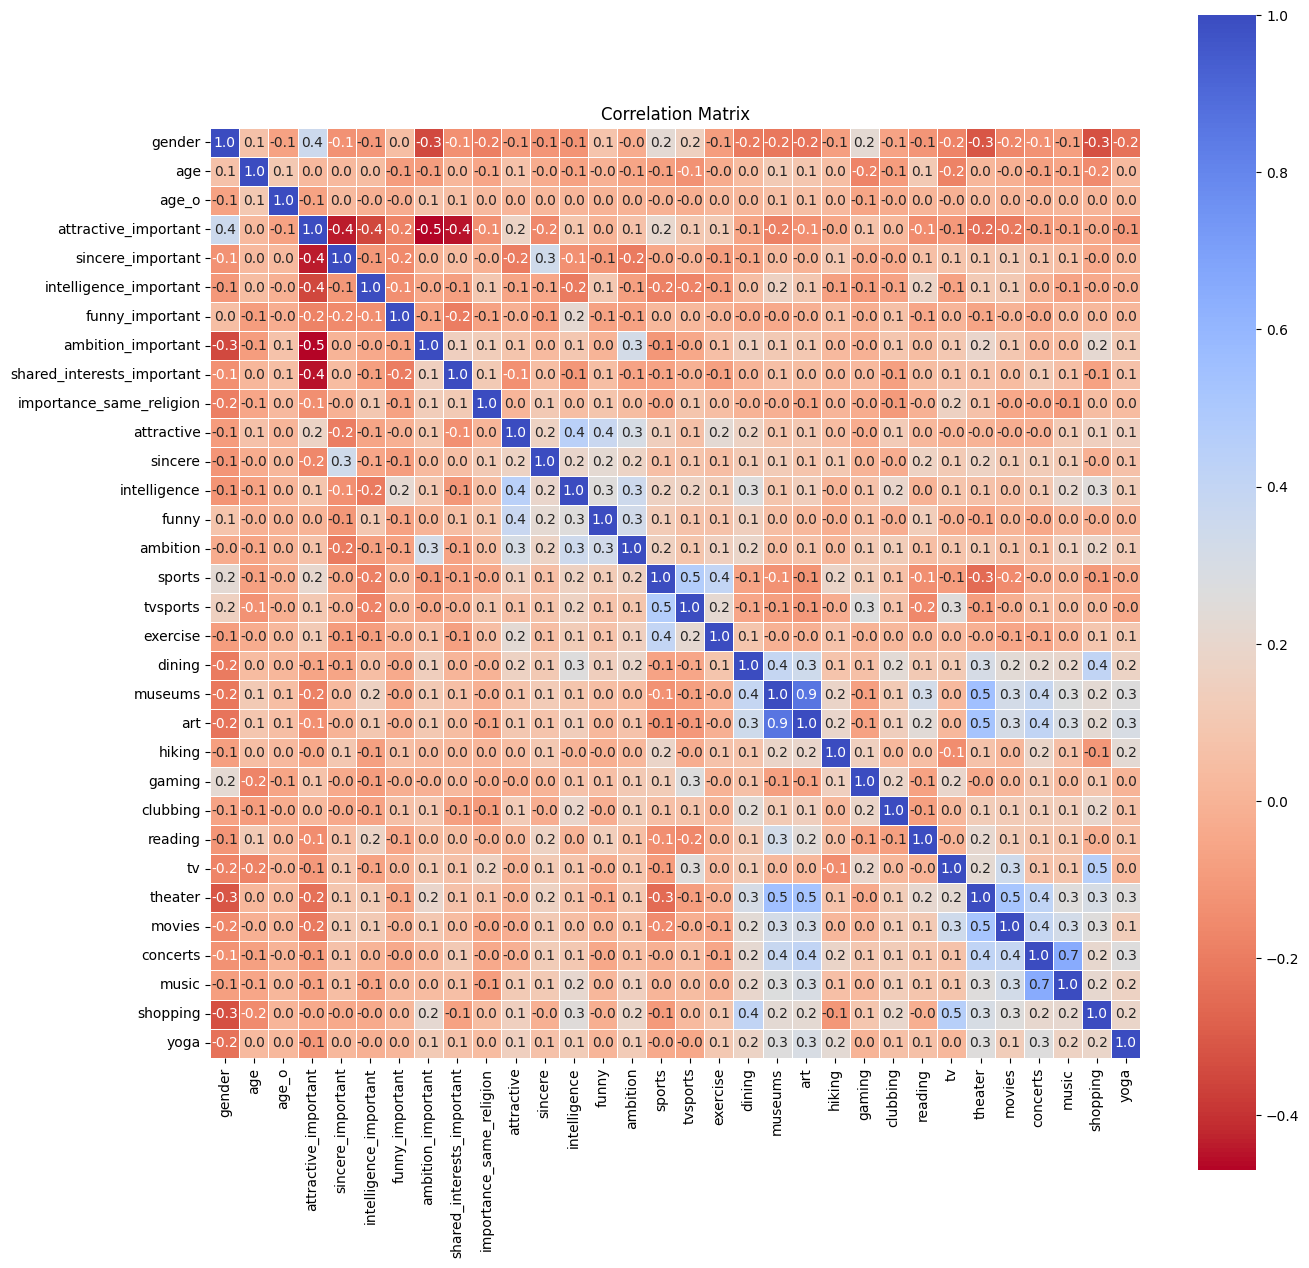

In [31]:
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(data=dataset_v3.corr(), cmap ='coolwarm_r',annot=True,fmt=".1f", linewidth=.5,square=True)

#PCA#

In [ ]:
X = dataset_v3.copy()
clusterer = HDBSCAN()
hdbs_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, hdbs_labels)
hdbs = davies_bouldin_score(X, hdbs_labels)
print("Silhouette Average = {}\n Davies Bouldin Index = {}" .format(silhouette_avg,hdbs))
print(set(hdbs_labels))

In [ ]:
X = dataset_v3.copy()
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X = X_scaled
pca = PCA()
components = pca.fit_transform(X)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=hdbs_labels
    )
fig.update_traces(diagonal_visible=False)

In [ ]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=hdbs_labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
)
fig.update_traces(marker=dict(size=1))
fig.show()

#TSNE#

In [ ]:
X = dataset_v3.copy()
X_embeddedd = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30.0).fit_transform(X)
X_embeddedd.shape

labels = set(hdbs_labels)
fig = figsize = (15,15)
g = plt.scatter(X_embeddedd[:,0], X_embeddedd[:,1], c = hdbs_labels, cmap = 'plasma')
plt.legend(handles=g.legend_elements()[0], labels=labels)